In [45]:
#----------- Question4(a) -----------#
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import math 

data = pd.read_csv('classification_eval_1.csv')
data_alg = data.iloc[:,1:5]
algs = ["alg_1", "alg_2", "alg_3", "alg_4"]
#algs = ["alg_4"]
for alg in algs:
    d = np.array(data_alg[alg])
    for i in range(len(d)):
        if d[i] >= 0.5:
            d[i] = 1
        else:
            d[i] = 0
    s = accuracy_score(d, np.array(data["gt"]))
    print(s*100)


61.6
55.00000000000001
32.1
32.9


In [30]:
#----------- Question4(b) -----------#
for alg in algs:
    print(roc_auc_score( data["gt"],data_alg[alg]))


0.7320932281198045
0.6316285763914737
0.06395009801732053
0.8473876522990644


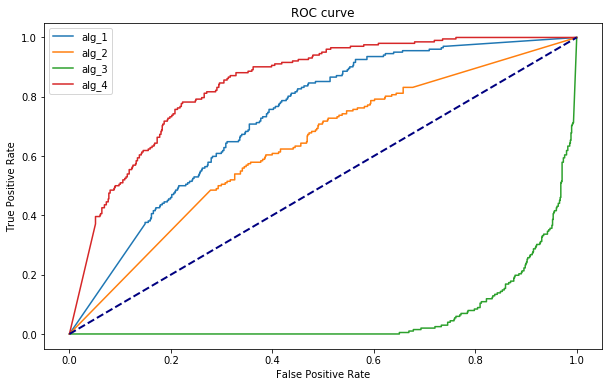

In [47]:
#----------- Question4(c) -----------#

plt.figure(figsize=(10,6))
for alg in algs:
    fpr, tpr, threshold = roc_curve(np.array(data["gt"]),np.array(data_alg[alg]))
    plt.plot(fpr, tpr, label = alg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.savefig("IAML_Q4b.png")
plt.show()

0.7320932281198045
0.6316285763914737
0.9360499019826796
0.8473876522990644


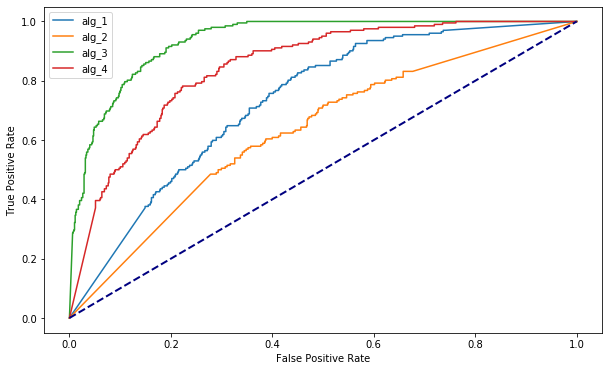

In [57]:

plt.figure(figsize=(10,6))
for alg in algs:
    if alg !="alg_3":
        fpr, tpr, threshold = roc_curve(np.array(data["gt"]),np.array(data_alg[alg]))
        plt.plot(fpr, tpr, label = alg)
        print(auc(fpr, tpr))
    else:
        fpr, tpr, threshold = roc_curve(np.array(data["gt"]),1 - np.array(data_alg[alg]))
        plt.plot(fpr, tpr, label = alg)
        print(auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()